In [1]:
import os
current_path = os.getcwd()
folder = "MA"
path =  folder.join(current_path.split(folder)[:-1])+folder
os.chdir(path)

In [2]:
import numpy as np
import pandas as pd
import statistics
from Scenarios.scenario_types.BaseScenario import BaseScenario
from Repair.Robust_PCA.robust_PCA_estimator import Robust_PCA_estimator  as  RP_old
from sklearn.decomposition import PCA


from matplotlib import pyplot as plt

In [3]:
from Repair.cdrec.recovery import centroid_recovery

scen = BaseScenario("YAHOO.csv")
injected = scen.i_get_scenario(0)["injected"].values
truth = scen.i_get_scenario(0)["original"].values
anomaly_class = scen.i_get_scenario(0)["class"].values



['theisplots\\IMR.eps', 'outputfile_2', 'run.py', 'bayesiancomp', 'thesisplots', 'ParameterTuning', '.gitignore', 'myfile.txt', 'IMR.eps', 'IMR.pgf', 'run_ressources', 'notebooks', 'Scenarios', '.git', 'data_methods', 'varanomsizeampBayesianOptimization.svg', 'A_questions', 'myfile.toml', '__pycache__', 'Injection', '.idea', 'Repair', 'searchresults.csv', 'install.sh', 'play.py', 'screen_example2', 'IMR.svg', 'Data', 'play2.py', 'error_ranking.py']
Data/YAHOO.csv


In [4]:
from Repair.Dimensionality_Reduction.RobustPCA.Robust_pca_estimator import Robust_PCA_estimator
from Repair.Dimensionality_Reduction.CDrec.CDrecclassifier import CD_Rec_estimator

cd_estim = CD_Rec_estimator(truncation=2 , threshold = 0.3)
robust_estim = Robust_PCA_estimator(n_components= 2, delta=0.1,threshold = 0.2,max_iter=30)



classifiers_cd = cd_estim.classify(injected*1)


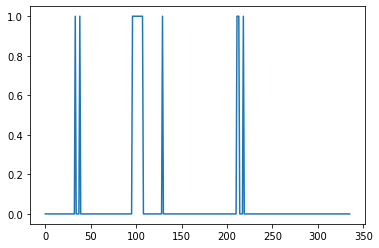

In [5]:
plt.plot(classifiers_cd[:,0])
plt.show()

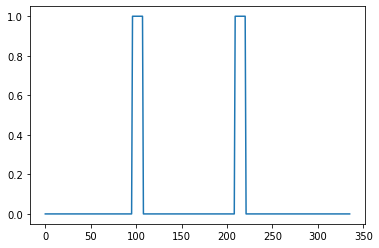

In [6]:
classifiers_robust = robust_estim.classify(injected)
plt.plot(classifiers_robust[:,0])
plt.show()

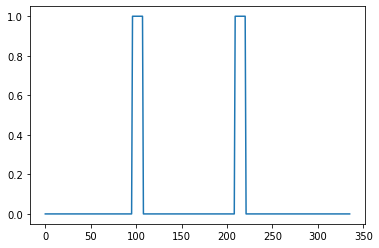

In [7]:
plt.plot(anomaly_class[:,0])
plt.show()

In [13]:
cd_repair = cd_estim.repair(injected,anomaly_class)

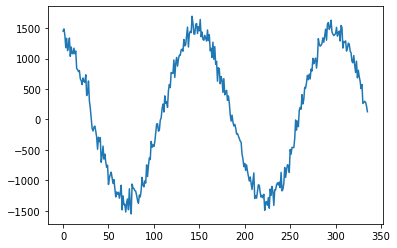

In [14]:
plt.plot(cd_repair[:,0])
plt.show()

In [20]:
robust_repair = robust_estim.repair(injected,anomaly_class)
plt.plot(robust_repair[:,0])
plt.show()
print(injected)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])